# Proton Training and Validation Modularized

## Dependencies

In [1]:
# !pip3 install swifter
# !pip3 install xgboost
# !pip3 install tqdm
# !pip3 install category_encoders
# !pip3 install joblib
# !pip3 install scikit-plot
# !pip3 install catboost
# !pip3 install RegscorePy
# !pip3 install -U spacy
# !pip3 install gensim
# !pip3 install xlrd
# !pip3 install lightgbm
# !pip3 install hyperopt
# !pip3 install holidays
# !pip3 install textblob
# !pip3 install pydotplus
# !pip3 install graphviz

# Download en_core_web_sm for text analytics

## Main Function

Enter the path here : C:\Users\YESHPAL SINGH\Downloads\telco.csv
#### RUNNING WAIT ####
extension is csv
We have a csv file
This file has 21 columns and 30 rows

DataFrame Succesfully imported

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Enter 'quit' to quit
What would you like to predict? : Churn
Target Spotted!

Enter 'quit' to quit
Enter the Key/Identification Column : customerID
Key Spotted!
Do you think you have Successive Targets based on the current target? If yes, enter the column names below 
in this format separated by commas: col1,col2,col3

No Columns removed
Would you like to remove any other ID,zip Code,Phone Numbers,UNIQUE lists, 
Or colum

Time taken to tokenize the DataFrame 0.7179028987884521
Columns that are going to be removed are  []
Time taken for completion of excess column removal: 0.0009975433349609375
No Remarks or Comments Found 
Extracting Review Columns time 0.7278752326965332
No review/comment columns found
total text analytics time taken = 0.7278752326965332
Text Engineering Result Empty DataFrame
Columns: []
Index: []

 #### PEARSON CORRELATION ####

0 columns removed which were highly correlated
The columns removed are []
 #### DONE ####
num_df - (5634, 3)
disc_df - (5634, 16)
DATE_DF - (0, 0)
TEXT_DF - (0, 0)

 #### TRANSFORMATIONS ####

 #### TARGET ENCODING ####
(5634, 19)
(5634,)
Target Encoding Time taken : 0.27248716354370117

 #### FEATURE SELECTION ####
(5634, 19)
runnning classifier selector

Binary Classification




thresh2: 65.8

The final score sheet of 11 selected columns with importances:

            col_name  scores2   t/f
1     MonthlyCharges      701  True
2       TotalCharges      624  True
0             tenure      503  True
5      PaymentMethod      185  True
12            gender      117  True
10          Contract      111  True
7      MultipleLines       95  True
6       OnlineBackup       88  True
11  PaperlessBilling       87  True
16       TechSupport       82  True
8         Dependents       74  True

8 columns are eliminated during Feature Selection which are:
{'InternetService', 'StreamingTV', 'SeniorCitizen', 'Partner', 'OnlineSecurity', 'PhoneService', 'StreamingMovies', 'DeviceProtection'}
(5634, 19)
(5634,)
Feature Selection Time taken : 1.8809585571289062


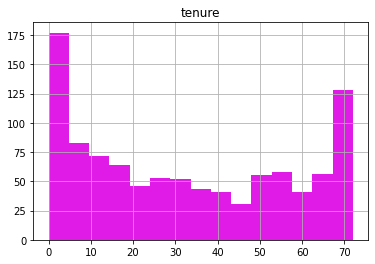

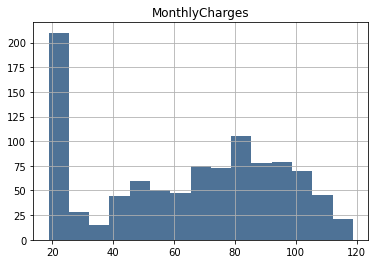

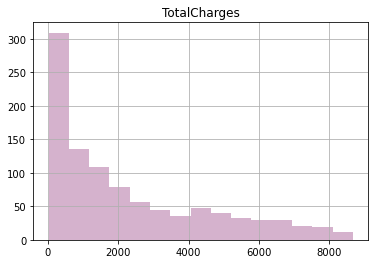

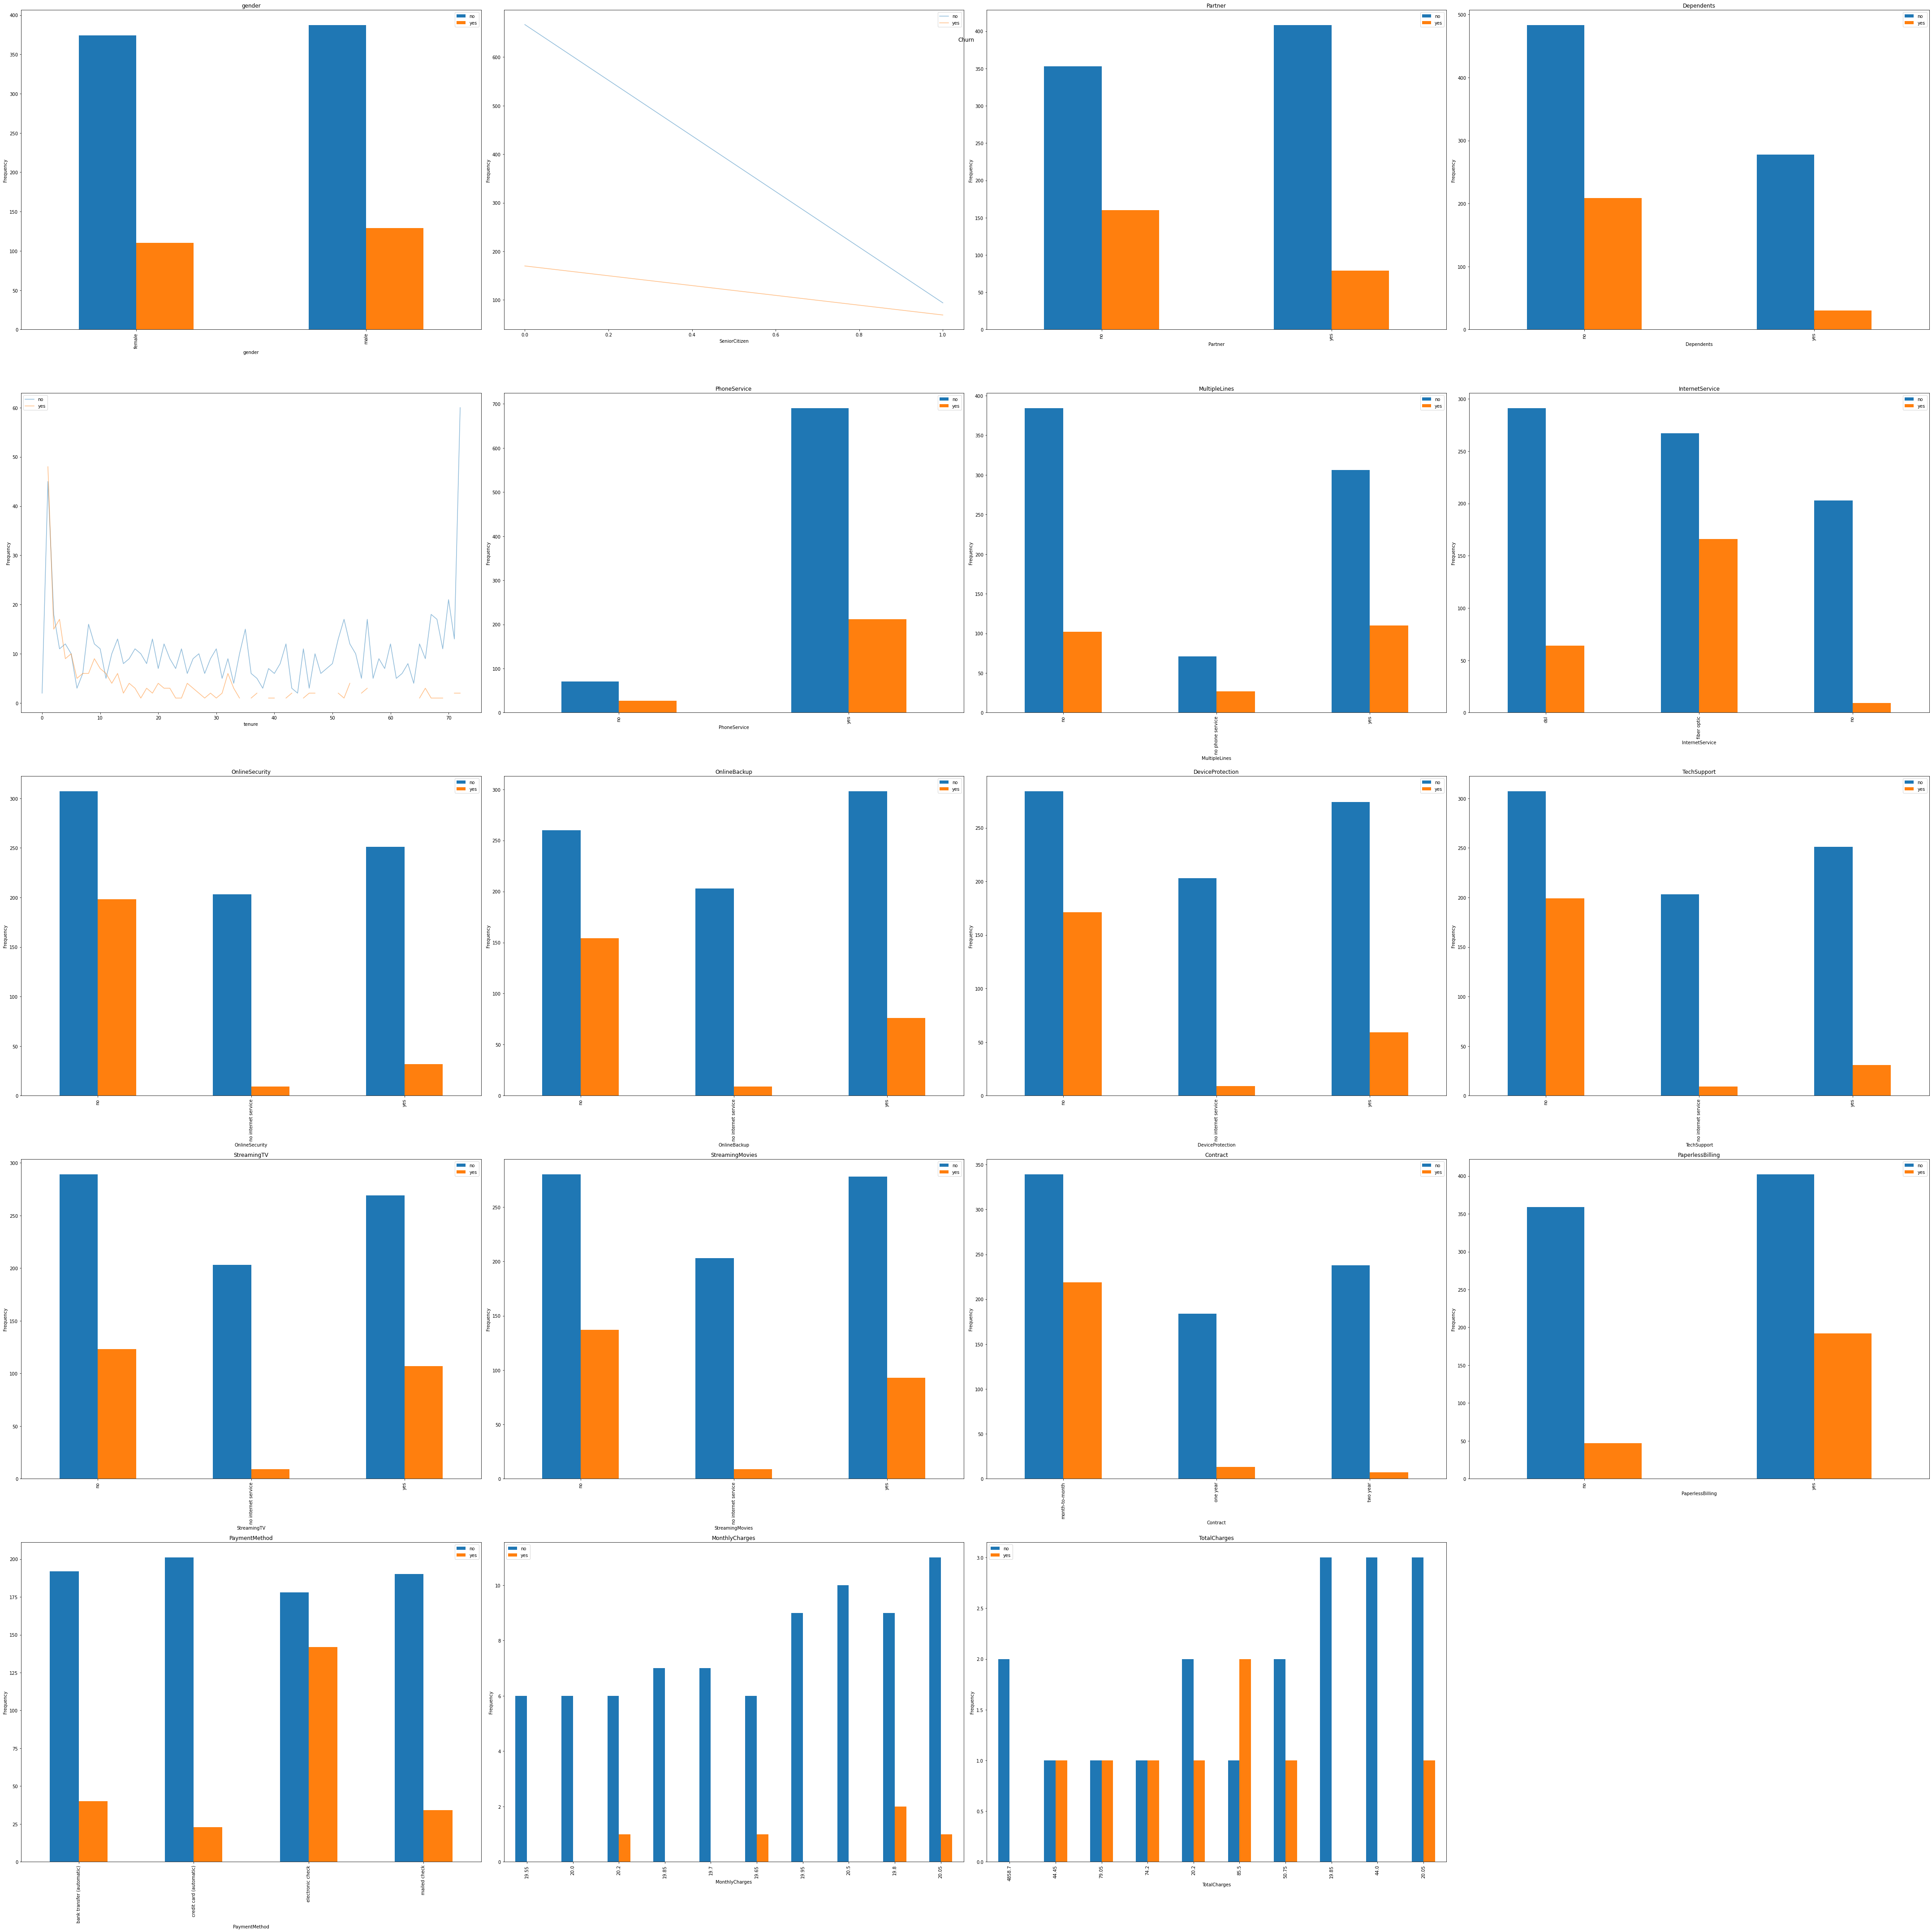

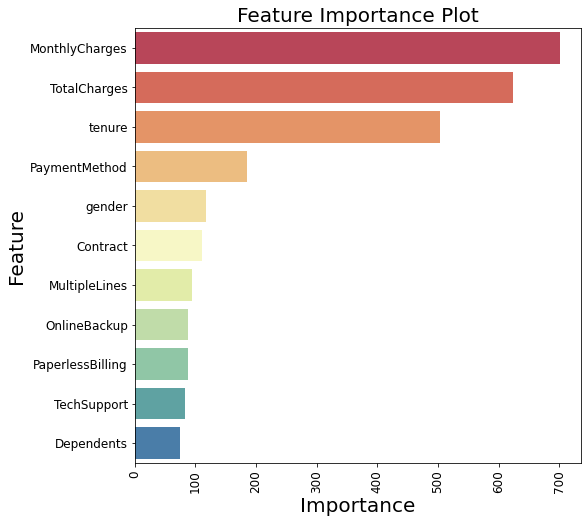

Feature Selection Plot Time taken : 3.4517269134521484
(5634, 11)
(5634,)

 #### DECISION TREE VISUALIZATION ####
DISCRETE COLUMNS ARE:      SeniorCitizen InternetService              PaymentMethod  \
0                0     fiber optic           electronic check   
1                0     fiber optic  bank transfer (automatic)   
2                0              no  bank transfer (automatic)   
3                0             dsl  bank transfer (automatic)   
4                0     fiber optic  bank transfer (automatic)   
...            ...             ...                        ...   
5629             0     fiber optic           electronic check   
5630             0              no    credit card (automatic)   
5631             0              no           electronic check   
5632             1     fiber optic           electronic check   
5633             0     fiber optic           electronic check   

             OnlineBackup MultipleLines Dependents          StreamingTV  \
0       



 #### TRANSFORMATION AND PREDICTION ####
num_df - (1409, 3)
disc_df - (1409, 16)
DATE_DF - (0, 0)
TEXT_DF - (0, 0)

This is final shape of X_test : (1409, 11)

 #### PRINTING THE LIST OF COLUMNS AND ITS TYPES THAT ENTER THE MODEL TRAINING ####
#### PRINTING X_test ####
Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'PaymentMethod',
       'OnlineBackup', 'MultipleLines', 'Dependents', 'Contract',
       'PaperlessBilling', 'gender', 'TechSupport'],
      dtype='object')
tenure              float64
MonthlyCharges      float64
TotalCharges        float64
PaymentMethod       float64
OnlineBackup        float64
MultipleLines       float64
Dependents          float64
Contract            float64
PaperlessBilling    float64
gender              float64
TechSupport         float64
dtype: object


      tenure  MonthlyCharges  TotalCharges  PaymentMethod  OnlineBackup  \
0   0.043923        0.005895      0.000000       0.000000      0.000000   
1   0.000000        0.311355      0.002544   

Accuracy : 79.91483321504613
MODEL SAVED

Total Model Training Time taken : 29.15839171409607
              precision    recall  f1-score   support

          no       0.84      0.90      0.87      1035
         yes       0.66      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


File Saved as preview.csv

Code executed Successfully

############# END ###########

	 #### CODE EXECUTED SUCCESSFULLY ####

	 #### END ####

#### TOTAL TIME TAKEN : 40.10421347618103 ####


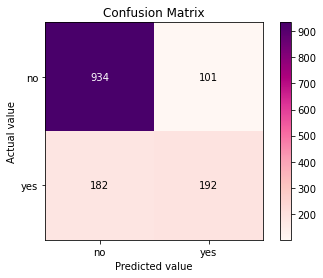

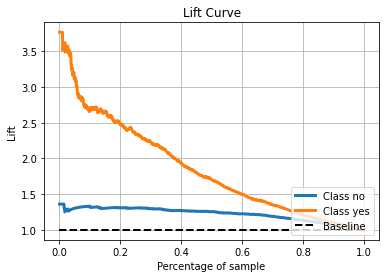

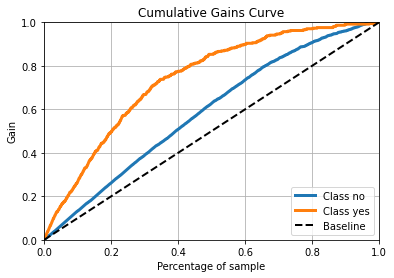

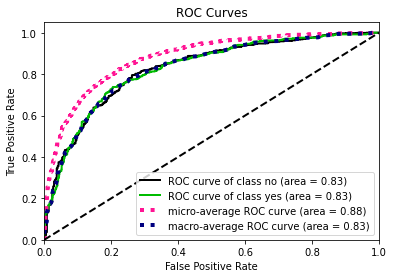

In [2]:
from userInputs import *
from INIT import *
from score import *
from all_other_functions import targetAnalysis
import time
import pandas as pd
import numpy as np
import swifter
import joblib
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split

def main():
    '''
    PROTON MAIN FUNCTION
    '''
    spinnerBool = False
    path = input('Enter the path here : ')
    error = False
    if path:
        df,csvPath = importFile(path,nrows=30)
        df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
        df = dataHandler(df) # If first few rows contains unnecessary info
        info = getUserInput(df)
        if not info:
            error = True
    else:
        df = None
        print('\nQuitting Process\n')
        info = None
        error = True

    te = time.time()
    try:
        if info:
            spinnerBool = True
            ################## TRAINING INIT ##################
            if csvPath:
                path = 'SheetSheetSheet.csv'
            df,_ = importFile(path,nrows=None)
            df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
            df = dataHandler(df) # If first few rows contains unnecessary info
            tts = time.time()
            if isinstance(df,pd.DataFrame):
                target = info['target']
                df = df.dropna(axis=0,subset=[target])
                class_or_Reg = targetAnalysis(df[target])
                if class_or_Reg == 'Classification':
                    if len(df) >1000000:
                        df_train, _ = train_test_split(df, train_size=1000000,random_state=1, stratify=df[target])
                        print("Dataset size has been capped")
                        init_info,validation = INIT(df_train,info)
                    else:
                        init_info,validation = INIT(df,info)
                elif class_or_Reg == 'Regression':
                    dfr = df.sample(n=1000000, random_state=1) if len(df)>1000000 else df.copy()
                    init_info,validation = INIT(dfr,info)
                elif class_or_Reg is None:
                    init_info,validation = None,None
            else:
                init_info,validation = None,None
            tte = time.time()
            print('\n TOTAL TRAINING DATA CLEANING AND PLOTS : {}'.format(tte-tts))
            ################## TRAINING INIT ##################

            if isinstance(validation,pd.DataFrame):
                ################## VALIDATION AND PREDICTION ##################
                score(validation,init_info,validation=True)
                ################## VALIDATION AND PREDICTION ##################
                print('\n\t #### CODE EXECUTED SUCCESSFULLY ####')
                print('\n\t #### END ####')
            else:
                print('\n\t #### CODE DID NOT RUN COMPLETELY ####')
            spinnerBool = False
    except KeyboardInterrupt:
        print('QUITTING!')   
        return None
#     except Exception as e:
#         print('Code did not run completely')
#         print('Code ran into an error')
#         print('The error message received is')
#         print(e)
#         return None
    ee = time.time()
    print('\n#### TOTAL TIME TAKEN : {} ####'.format(ee-te))
    return 1

if __name__ == '__main__':
    # Main Function call
    ret = main()

In [3]:
pre = pd.read_csv('preview.csv')
pre.index = np.arange(1,len(pre)+1)
pre

,customerID,Actual Values,Predicted Values,Class no Probabilities,Class yes Probabilities
1,7976-CICYS,no,no,0.815595,0.184405
2,0067-DKWBL,yes,yes,0.387013,0.612987
3,2386-OWURY,no,no,0.756703,0.243297
4,4439-YRNVD,no,no,0.723729,0.276271
5,9574-BOSMD,no,no,0.891124,0.108876
...,...,...,...,...,...
96,4081-DYXAV,yes,no,0.756964,0.243036
97,7808-DVWEP,no,no,0.708598,0.291402
98,9593-CVZKR,no,no,0.876224,0.123776
99,7167-PCEYD,no,no,0.895862,0.104138


In [4]:
# Set CSS properties for th elements in dataframe
th_props = [
    ('background', 'rgb(12, 64, 90)'),
    ('background', 'linear-gradient(0deg, rgba(21, 112, 157) 0%, rgba(12, 64, 90) 120%)'),
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'white'),
    ('border', '2px') ,
    ('border', 'solid white'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '2px'),
    ('border','solid white')    
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

def color_func(value):
    if value.name in ['Weighted F1','RMSE']:
        color= '#f7f7ba'
    else:
#         print(value)
        color= '#e8f7fc'
    return ['background-color: %s' %color]*len(value)


MC = pd.read_csv('MC.csv')
if 'Weighted F1' in MC.columns:
    cap='This table is sorted by F1 Score(Weighted F1), higher the better'
else:
    cap ='This table is sorted by Root Mean Squared Error(RMSE), lower the better'
MC.index = np.arange(1,len(MC)+1)
MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0)

,Machine Learning Model,Accuracy%,Precision,Recall,Weighted F1,ROC_AUC_score,Kappa,MCC,KS_statistic,KS_p-value,Total time (hh:mm:ss)
1,Ensemble (XGBoost+Light Gradient Boosting Model+Neural Network),79.91%,0.788707,0.799148,0.790734,0.707892,0.446676,0.452385,0.057488,0.018982,00:00:04
2,XGBoost,78.85%,0.775951,0.788502,0.778172,0.689546,0.411409,0.418374,0.065295,0.004912,00:00:00
3,Random Forest,77.43%,0.766900,0.774308,0.769839,0.692692,0.399717,0.400979,0.029808,0.558710,00:00:00
4,Naive Bayes(Bayesisan Statistics),75.80%,0.794836,0.757984,0.768518,0.751593,0.447753,0.460633,0.102910,0.000001,00:00:00
5,Logistic Regression,74.66%,0.801805,0.746629,0.759776,0.760086,0.444626,0.467597,0.141235,0.000000,00:00:00
6,Extra Trees Classifier,75.37%,0.759169,0.753726,0.756203,0.694904,0.381662,0.382041,0.017743,0.979639,00:00:00
7,CatBoost,74.02%,0.795418,0.740241,0.753688,0.751469,0.430209,0.452230,0.140525,0.000000,00:00:18
8,Light Gradient Boosting Model,74.02%,0.795418,0.740241,0.753688,0.751469,0.430209,0.452230,0.140525,0.000000,00:00:00
9,Neural Network,74.59%,0.718049,0.745919,0.672552,0.541882,0.113914,0.177627,0.220014,0.000000,00:00:02
10,Support Vector Machine,26.54%,0.070457,0.265436,0.111355,0.500000,0.000000,0.000000,0.734564,0.000000,00:00:00


In [5]:
# joblib.load('XT').min().min()
MC.shape

(10, 11)

In [6]:
# joblib.load('Xt').min().min()

In [7]:
# joblib.load('XT').max().max()

In [8]:
# joblib.load('Xt').max().max()

In [9]:
# joblib.load('YT').max()

In [10]:
# joblib.load('Yt').max()

In [11]:
# joblib.load('YT').min()

In [12]:
# joblib.load('Yt').min()

In [13]:
# import pandas as pd
# # df = pd.read_csv('SheetSheetSheet.csv')
